In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# EDA

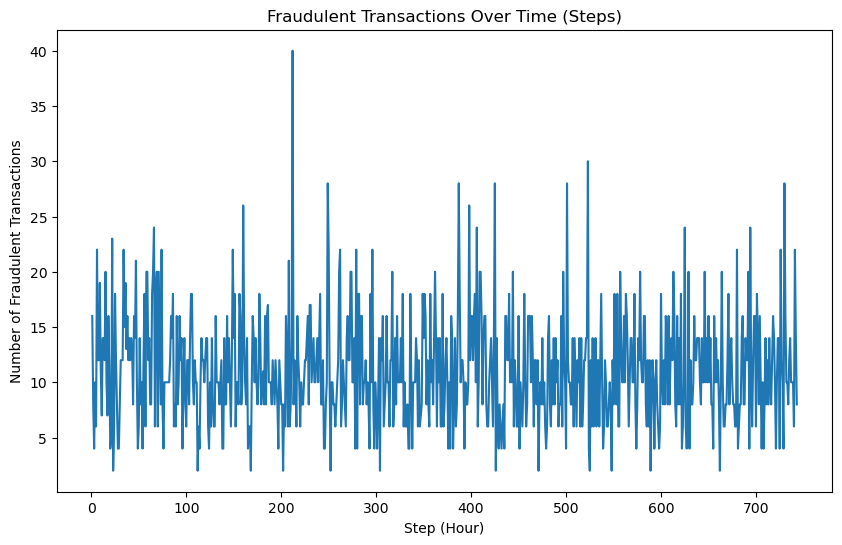

In [5]:
fraud_by_step = df[df['isFraud'] == 1].groupby('step').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_by_step.index, y=fraud_by_step.values)
plt.title('Fraudulent Transactions Over Time (Steps)')
plt.xlabel('Step (Hour)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

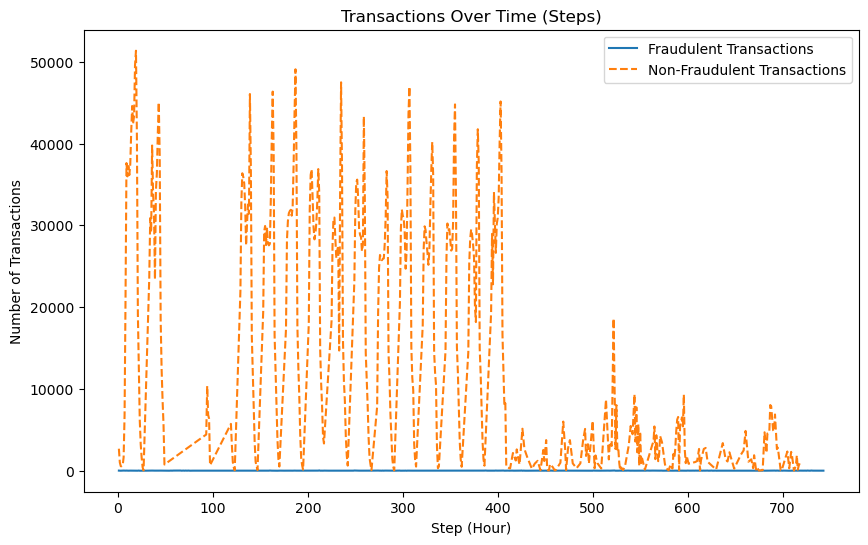

In [6]:
fraud_by_step = df[df['isFraud'] == 1].groupby('step').size()
non_fraud_by_step = df[df['isFraud'] == 0].groupby('step').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_by_step.index, y=fraud_by_step.values, label='Fraudulent Transactions')
sns.lineplot(x=non_fraud_by_step.index, y=non_fraud_by_step.values, label='Non-Fraudulent Transactions', linestyle='--')
plt.title('Transactions Over Time (Steps)')
plt.xlabel('Step (Hour)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Checking whether the data is imbalanced or not

In [7]:
class_distribution = df['isFraud'].value_counts()
print(class_distribution)

0    6354407
1       8213
Name: isFraud, dtype: int64


# Handling missing values

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Creating dummy variable for 'Type' column

In [3]:
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


C:\Users\Palak Kapahi\AppData\Local\Temp\ipykernel_27416\1086040597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])


<Axes: xlabel='amount', ylabel='Density'>

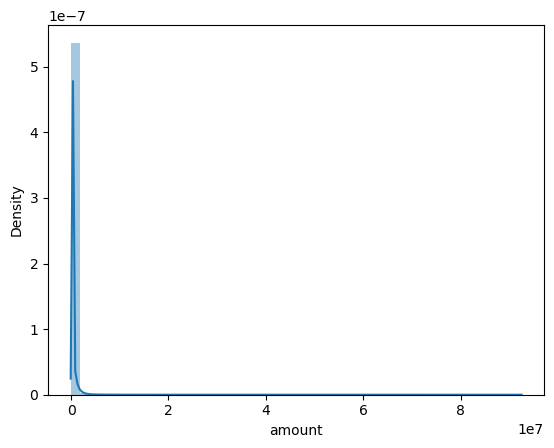

In [10]:
sns.distplot(df['amount'])

C:\Users\Palak Kapahi\AppData\Local\Temp\ipykernel_27416\3384504795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceOrg'])


<Axes: xlabel='oldbalanceOrg', ylabel='Density'>

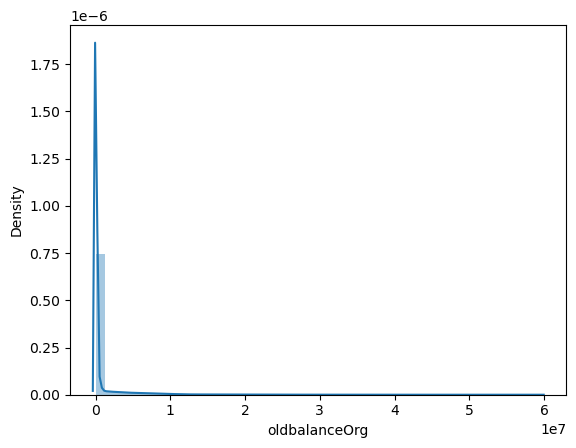

In [11]:
sns.distplot(df['oldbalanceOrg'])

C:\Users\Palak Kapahi\AppData\Local\Temp\ipykernel_27416\2318427200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'])


<Axes: xlabel='step', ylabel='Density'>

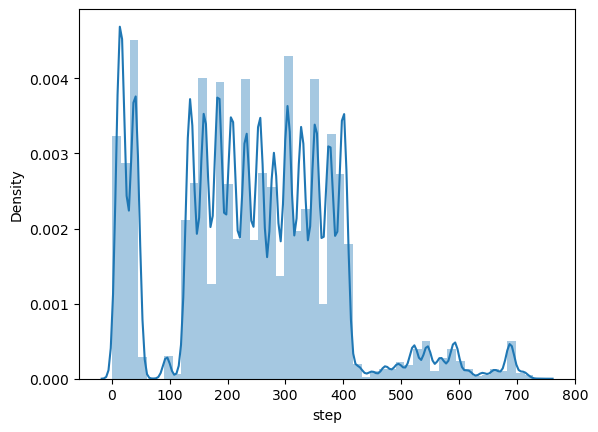

In [12]:
sns.distplot(df['step'])

C:\Users\Palak Kapahi\AppData\Local\Temp\ipykernel_27416\139502769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newbalanceOrig'])


<Axes: xlabel='newbalanceOrig', ylabel='Density'>

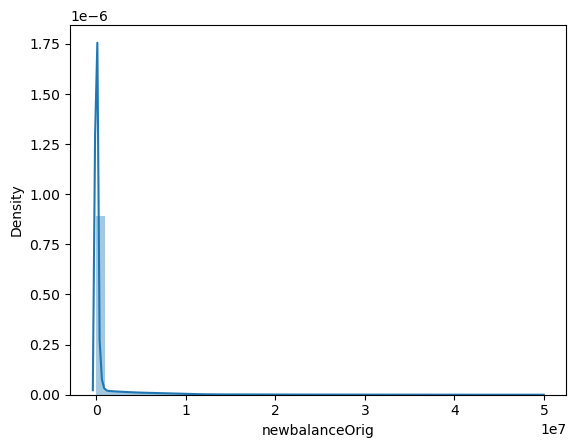

In [13]:
sns.distplot(df['newbalanceOrig'])

C:\Users\Palak Kapahi\AppData\Local\Temp\ipykernel_27416\3261627356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceDest'])


<Axes: xlabel='oldbalanceDest', ylabel='Density'>

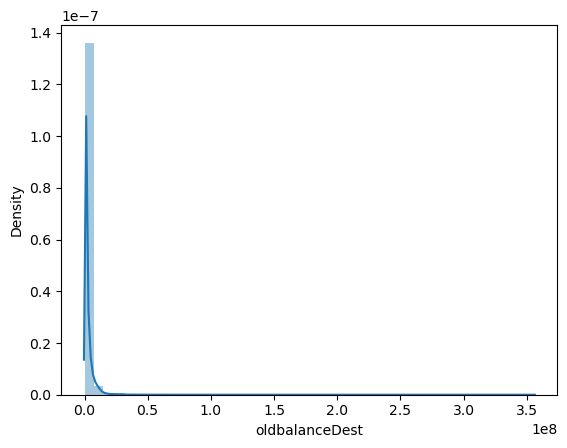

In [14]:
sns.distplot(df['oldbalanceDest'])

C:\Users\Palak Kapahi\AppData\Local\Temp\ipykernel_27416\2642253595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newbalanceDest'])


<Axes: xlabel='newbalanceDest', ylabel='Density'>

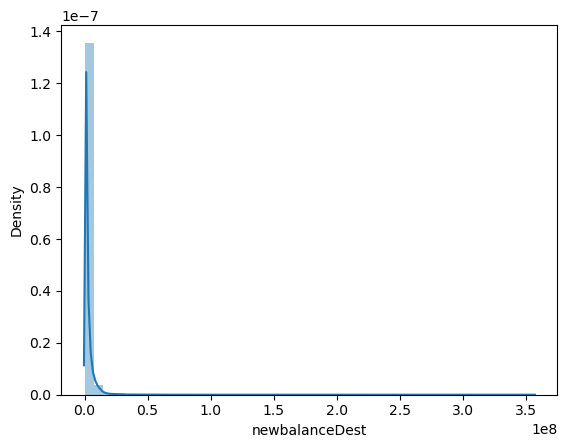

In [15]:
sns.distplot(df['newbalanceDest'])

# Handling Outliers

In [4]:
from sklearn.ensemble import IsolationForest

X = df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X)

outliers = iso_forest.predict(X)

df['outlier'] = outliers

df_no_outliers = df[df['outlier'] != -1]

C:\Users\Palak Kapahi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [17]:
df_no_outliers

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,outlier
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0,1
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0,1
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0,1
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,0,0,0,1,1
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0,1
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1,1
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1,1


In [19]:
df_no_outliers.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06,6.298997e+06
mean,2.432773e+02,1.630957e+05,7.265284e+05,7.474522e+05,9.439976e+05,1.048182e+06,1.232101e-03,1.587554e-06,3.539614e-01,6.550408e-03,3.415579e-01,8.219975e-02
std,1.421926e+02,3.394977e+05,2.441141e+06,2.478355e+06,2.068097e+06,2.163513e+06,3.507967e-02,1.259981e-03,4.781974e-01,8.066908e-02,4.742321e-01,2.746688e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.322524e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.355277e+04,1.368400e+04,0.000000e+00,1.238299e+05,2.066152e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.340000e+02,2.068168e+05,1.052650e+05,1.378879e+05,9.072276e+05,1.074777e+06,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,1.000000e+07,3.410658e+07,3.421975e+07,6.496395e+07,8.149653e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Multi-collinearity

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_columns = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
numerical_df = df_no_outliers[numerical_columns]

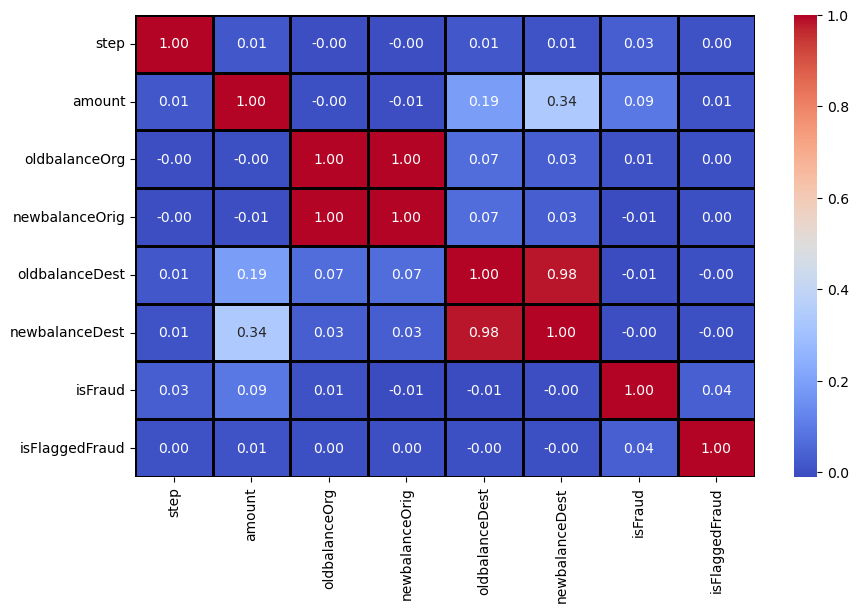

In [21]:
corr_matrix = df_no_outliers[numerical_columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.show()

In [22]:
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]

print(vif_data)

          Feature         VIF
0            step    1.330045
1          amount    3.633100
2   oldbalanceOrg  576.452343
3  newbalanceOrig  582.861897
4  oldbalanceDest   91.121090
5  newbalanceDest  100.631748
6         isFraud    1.161761
7  isFlaggedFraud    1.001481


# PCA - dimensionality reduction
### Used this methodology to reduce the high dimensional data into the relevant low dimensional data

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
y = df['isFraud'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA() 
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print("Explained variance ratio of each component:", explained_variance)
print("Cumulative variance explained:", cumulative_variance)

Explained variance ratio of each component: [2.26745119e-01 1.88918476e-01 1.31796492e-01 1.01774127e-01
 9.20383810e-02 9.10954696e-02 9.03273056e-02 5.63125735e-02
 2.03008514e-02 6.10567546e-04 8.06376194e-05]
Cumulative variance explained: [0.22674512 0.41566359 0.54746009 0.64923421 0.74127259 0.83236806
 0.92269537 0.97900794 0.99930879 0.99991936 1.        ]


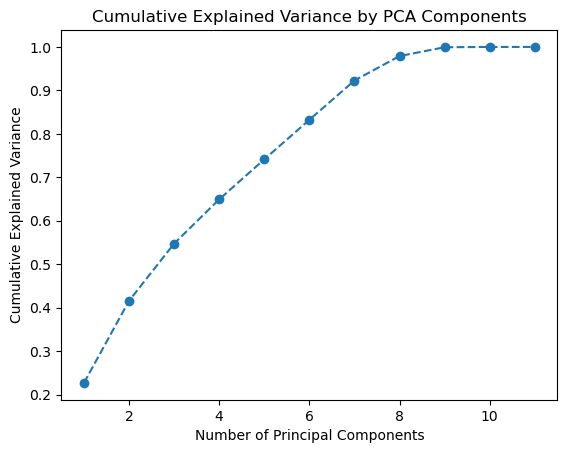

In [24]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### After applying PCA on all numerical data, 9 components are relevant

In [7]:
num_components = 9  
X_reduced = pca_df.iloc[:, :num_components]

# Balancing data using SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=121)

oversampler = SMOTE(random_state=121)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [27]:
class_distribution_resampled = y_resampled.value_counts()
print(class_distribution_resampled)

0    5083571
1    5083571
Name: isFraud, dtype: int64


In [9]:
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=121)

# XG Boost

In [21]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 5.5 MB/s eta 0:00:00


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [10]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [11]:
xgb_model.fit(X_train_resampled, y_train_resampled)

C:\Users\Palak Kapahi\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:56:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [12]:
xgb_y_pred = xgb_model.predict(X_val_resampled)

## Evaluation on Validation set

In [15]:
accuracy = accuracy_score(y_val_resampled, xgb_y_pred)
cf = confusion_matrix(y_val_resampled, xgb_y_pred)
class_report = classification_report(y_val_resampled, xgb_y_pred)

print(f"Model Validation Accuracy with XGBoost: {accuracy}")
print("Confusion Matrix:")
print(cf)
print("Classification Report:")
print(class_report)

Model Validation Accuracy with XGBoost: 0.9910977958905868
Confusion Matrix:
[[1003908   13349]
 [   4753 1011419]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1017257
           1       0.99      1.00      0.99   1016172

    accuracy                           0.99   2033429
   macro avg       0.99      0.99      0.99   2033429
weighted avg       0.99      0.99      0.99   2033429



## Evaluation on Test set

In [16]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Test Accuracy with XGBoost: {accuracy}")
print("Confusion Matrix:")
print(cf)
print("Classification Report:")
print(class_report)

Model Test Accuracy with XGBoost: 0.9869786345876385
Confusion Matrix:
[[1254313   16523]
 [     47    1641]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270836
           1       0.09      0.97      0.17      1688

    accuracy                           0.99   1272524
   macro avg       0.55      0.98      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524



## Important features and their contributions

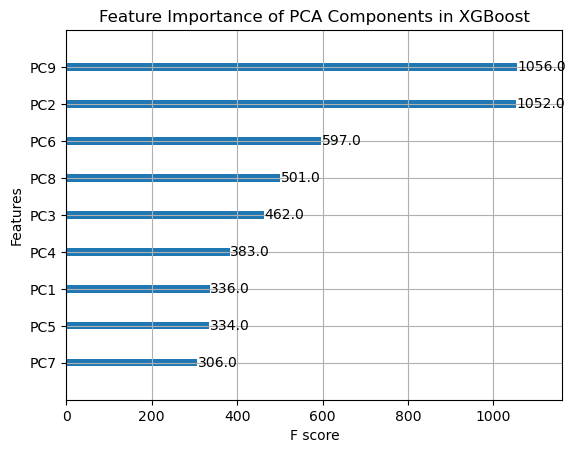

In [17]:
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=9)  
plt.title('Feature Importance of PCA Components in XGBoost')
plt.show()

In [18]:
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')
print("Feature Importance (PCA components):")
print(feature_importance)

Feature Importance (PCA components):
{'PC1': 336.0, 'PC2': 1052.0, 'PC3': 462.0, 'PC4': 383.0, 'PC5': 334.0, 'PC6': 597.0, 'PC7': 306.0, 'PC8': 501.0, 'PC9': 1056.0}


In [24]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("PCA Components (Loadings):\n", pca_components)

PCA Components (Loadings):
           step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
PC1   0.022463  0.382114       0.165797        0.164957        0.542454   
PC2   0.018904  0.125982      -0.664766       -0.666559        0.097138   
PC3   0.055202  0.230134      -0.044942       -0.043759        0.061667   
PC4   0.099596 -0.318936      -0.027815       -0.023890        0.421934   
PC5   0.117370 -0.037926      -0.012066       -0.011266       -0.022517   
PC6   0.542500  0.007085       0.005885        0.005569       -0.013860   
PC7  -0.823290 -0.026211      -0.014382       -0.013697        0.061685   
PC8  -0.015014  0.813080       0.037901        0.031495       -0.234491   
PC9   0.006992 -0.039893       0.184318        0.133867       -0.012928   
PC10  0.002862 -0.136235       0.001502        0.000021       -0.674396   
PC11 -0.000353 -0.003234       0.701430       -0.711860        0.003029   

      newbalanceDest  isFlaggedFraud  type_CASH_OUT  type_DEBIT  type_P

In [26]:
#loadings for PC9
pc9_loadings = pca_components.loc['PC9'].sort_values(ascending=False)
print("Original feature contributions to PC9 (sorted by influence):")
print(pc9_loadings)

#loadings for PC2
pc2_loadings = pca_components.loc['PC2'].sort_values(ascending=False)
print("Original feature contributions to PC2 (sorted by influence):")
print(pc2_loadings)

#loadings for PC6
pc6_loadings = pca_components.loc['PC6'].sort_values(ascending=False)
print("Original feature contributions to PC6 (sorted by influence):")
print(pc6_loadings)

#loadings for PC8
pc8_loadings = pca_components.loc['PC8'].sort_values(ascending=False)
print("Original feature contributions to PC8 (sorted by influence):")
print(pc8_loadings)

Original feature contributions to PC9 (sorted by influence):
type_CASH_OUT     0.623645
type_PAYMENT      0.618454
type_TRANSFER     0.400592
oldbalanceOrg     0.184318
newbalanceOrig    0.133867
type_DEBIT        0.114064
newbalanceDest    0.037327
step              0.006992
isFlaggedFraud   -0.001788
oldbalanceDest   -0.012928
amount           -0.039893
Name: PC9, dtype: float64
Original feature contributions to PC2 (sorted by influence):
type_CASH_OUT     0.233564
type_TRANSFER     0.128403
newbalanceDest    0.128088
amount            0.125982
oldbalanceDest    0.097138
type_PAYMENT      0.024337
step              0.018904
type_DEBIT        0.008525
isFlaggedFraud   -0.002969
oldbalanceOrg    -0.664766
newbalanceOrig   -0.666559
Name: PC2, dtype: float64
Original feature contributions to PC6 (sorted by influence):
isFlaggedFraud    0.835200
step              0.542500
type_CASH_OUT     0.032170
amount            0.007085
oldbalanceOrg     0.005885
newbalanceOrig    0.005569
type_PAYM

# Logistic Regression

In [27]:
scaler = StandardScaler()

In [28]:
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
X_val_resampled_scaled = scaler.fit_transform(X_val_resampled)

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [30]:
lr_model.fit(X_train_resampled_scaled, y_train_resampled)

C:\Users\Palak Kapahi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr_y_pred = lr_model.predict(X_val_resampled_scaled)

## Evaluation on Validation set

In [32]:
accuracy = accuracy_score(y_val_resampled, lr_y_pred)
cf = confusion_matrix(y_val_resampled, lr_y_pred)
class_report = classification_report(y_val_resampled, lr_y_pred)

print(f"Model Validation Accuracy with Logistic Regression: {accuracy}")
print("Confusion Matrix:")
print(cf)
print("Classification Report:")
print(class_report)

Model Validation Accuracy with Logistic Regression: 0.9250787708840584
Confusion Matrix:
[[938625  78632]
 [ 73715 942457]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92   1017257
           1       0.92      0.93      0.93   1016172

    accuracy                           0.93   2033429
   macro avg       0.93      0.93      0.93   2033429
weighted avg       0.93      0.93      0.93   2033429



## Evaluation on Test set

In [33]:
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Test Accuracy with Logistic Regression: {accuracy}")
print("Confusion Matrix:")
print(cf)
print("Classification Report:")
print(class_report)

Model Test Accuracy with Logistic Regression: 0.9246018149755918
Confusion Matrix:
[[1175002   95834]
 [    112    1576]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270836
           1       0.02      0.93      0.03      1688

    accuracy                           0.92   1272524
   macro avg       0.51      0.93      0.50   1272524
weighted avg       1.00      0.92      0.96   1272524



## Important features and their contributions

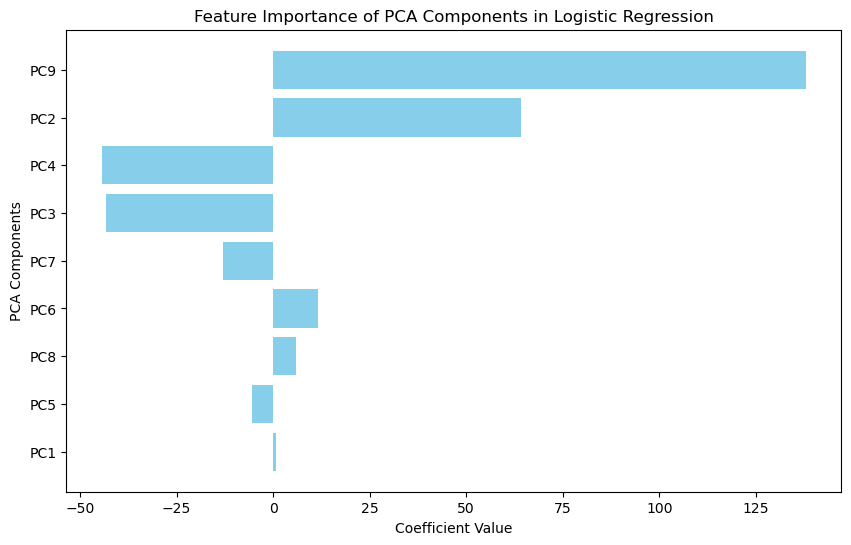

In [35]:
log_reg_coefficients = pd.Series(lr_model.coef_[0], index=[f'PC{i+1}' for i in range(X_train_resampled_scaled.shape[1])])

sorted_coefficients = log_reg_coefficients.sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients.index, sorted_coefficients.values, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('PCA Components')
plt.title('Feature Importance of PCA Components in Logistic Regression')
plt.gca().invert_yaxis() 
plt.show()


In [37]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("PCA Components (Loadings):\n", pca_components)

important_pca_components = ['PC9', 'PC2']  

for pc in important_pca_components:
    print(f"Original feature contributions to {pc}:")
    print(pca_components.loc[pc].sort_values(ascending=False))


PCA Components (Loadings):
           step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
PC1   0.022463  0.382114       0.165797        0.164957        0.542454   
PC2   0.018904  0.125982      -0.664766       -0.666559        0.097138   
PC3   0.055202  0.230134      -0.044942       -0.043759        0.061667   
PC4   0.099596 -0.318936      -0.027815       -0.023890        0.421934   
PC5   0.117370 -0.037926      -0.012066       -0.011266       -0.022517   
PC6   0.542500  0.007085       0.005885        0.005569       -0.013860   
PC7  -0.823290 -0.026211      -0.014382       -0.013697        0.061685   
PC8  -0.015014  0.813080       0.037901        0.031495       -0.234491   
PC9   0.006992 -0.039893       0.184318        0.133867       -0.012928   
PC10  0.002862 -0.136235       0.001502        0.000021       -0.674396   
PC11 -0.000353 -0.003234       0.701430       -0.711860        0.003029   

      newbalanceDest  isFlaggedFraud  type_CASH_OUT  type_DEBIT  type_P

### Yes all the selected features make sense as per their contributions in both the models.